# Visualizing Gradient Descent

This notebook demonstrates the **gradient descent** optimization algorithm. The goal is to find the minimum value of a function, in this case, the simple parabola $f(x) = (x - 3)^2$.

The algorithm starts at an initial guess and iteratively moves in the direction opposite to the gradient (the direction of steepest descent) until it converges to the function's minimum.

### 1. Imports and Function Definitions

In [1]:
# Import necessary libraries
# numpy is used for numerical operations.
import numpy as np
# matplotlib.pyplot is used for creating visualizations and plots.
import matplotlib.pyplot as plt
# pandas is used here to display the steps of the algorithm in a clean, tabular format.
import pandas as pd


# Define the objective function we want to minimize.
# It's a simple parabola with its minimum at x = 3.
def f(x):
    return (x - 3)**2


# Define the gradient (derivative) of the function.
# The gradient tells us the direction of the steepest ascent.
def grad_f(x):
    return 2 * (x - 3)

### 2. Set Parameters and Run Gradient Descent

In [2]:
# The learning rate (alpha) controls the size of each step we take.
alpha = 0.1

# The threshold is a small number that defines our stopping condition.
threshold = 1e-6

# This is the starting point for our search.
x = 0

# A list to store the history of our descent (step, x, f(x)).
steps = [(0, x, f(x))]

# Initialize a counter for the number of steps taken.
step = 0

# --- The Gradient Descent Loop ---
# This loop will run until the convergence condition is met.
while True:
    # Calculate the gradient at the current position 'x'.
    grad = grad_f(x)

    # This is the core update rule of gradient descent.
    x_new = x - alpha * grad

    # Log the new step.
    steps.append((step + 1, x_new, f(x_new)))

    # Check for convergence.
    if abs(x_new - x) < threshold:
        break # Exit the loop if converged.

    # If not converged, update x for the next iteration.
    x = x_new
    step += 1

### 3. Display Results in a Table

In [3]:
# Create a pandas DataFrame to print the steps in a nicely formatted table.
df = pd.DataFrame(steps, columns=["Step", "x", "f(x)"])
print("Gradient Descent Steps:")
display(df)

Gradient Descent Steps:


,Step,x,f(x)
0,0,0.000000,9.000000e+00
1,1,0.600000,5.760000e+00
2,2,1.080000,3.686400e+00
3,3,1.464000,2.359296e+00
4,4,1.771200,1.509949e+00
...,...,...,...
57,57,2.999991,8.063081e-11
58,58,2.999993,5.160372e-11
59,59,2.999994,3.302638e-11
60,60,2.999995,2.113688e-11


### 4. Plot the Function and the Descent Path

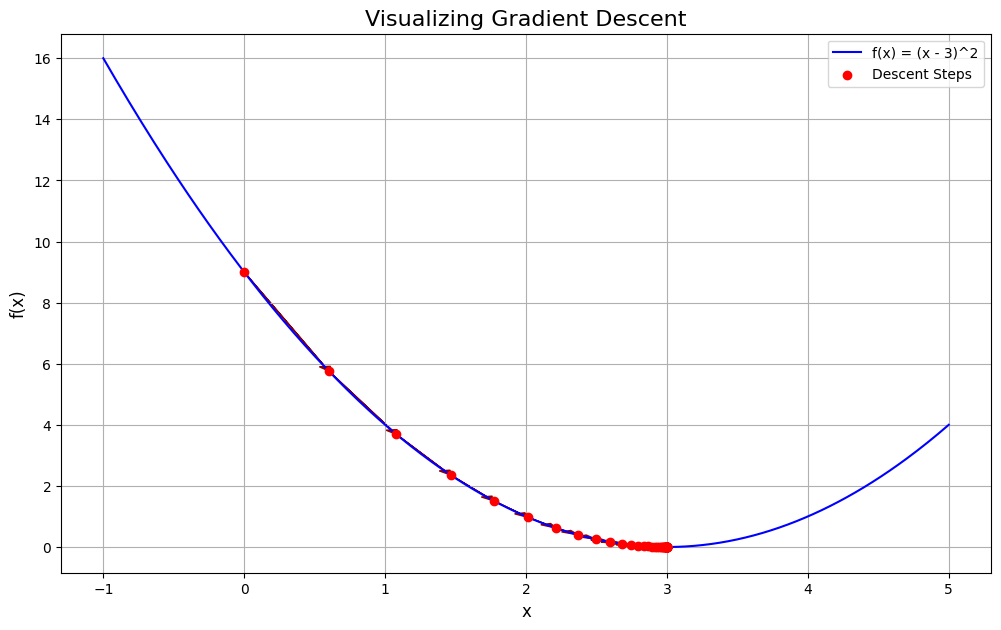

In [4]:
# Extract the x values and f(x) values from our 'steps' log for plotting.
x_vals = [s[1] for s in steps]
y_vals = [s[2] for s in steps]

# Create a range of x values to plot the smooth curve of the function.
x_plot = np.linspace(-1, 5, 400)
y_plot = f(x_plot)

# Create a new plot.
plt.figure(figsize=(12, 7))

# Plot the function f(x) = (x - 3)^2 as a continuous line.
plt.plot(x_plot, y_plot, label='f(x) = (x - 3)^2', color='blue')

# Plot the individual points visited during the gradient descent.
plt.scatter(x_vals, y_vals, color='red', zorder=5, label='Descent Steps')

# Draw arrows to show the path of the descent.
for i in range(len(x_vals) - 1):
    plt.arrow(
        x_vals[i], y_vals[i],               # Starting point
        x_vals[i+1] - x_vals[i],           # Change in x
        y_vals[i+1] - y_vals[i],           # Change in y
        head_width=0.08, head_length=0.15, 
        fc='darkred', ec='darkred', length_includes_head=True
    )

# Add titles and labels for clarity.
plt.title("Visualizing Gradient Descent", fontsize=16)
plt.xlabel("x", fontsize=12)
plt.ylabel("f(x)", fontsize=12)
plt.legend()
plt.grid(True)

# Show the plot.
plt.show()